<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/EXPERIMENT_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTEGRATING HED WITH LSD

##DOWNLOADING MODEL

In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz

--2025-02-22 20:09:55--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6390625 (6.1M) [application/octet-stream]
Saving to: ‘model.yml.gz’

model.yml.gz        100%[===================>]   6.09M  --.-KB/s    in 0.09s   

2025-02-22 20:09:56 (68.2 MB/s) - ‘model.yml.gz’ saved [6390625/6390625]



##INSTALLING REQUIRED LIBRAIRES

In [28]:
!pip install svgwrite
!pip install ezdxf svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.1 MB/s eta 0:00:00


In [16]:
!pip install opencv-python numpy
!pip install "opencv-contrib-python>=4.9.0"



##IMPORTING NECESSARY LIBRARIES

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from skimage.morphology import skeletonize


##DRIVER CODE

HED RESULT


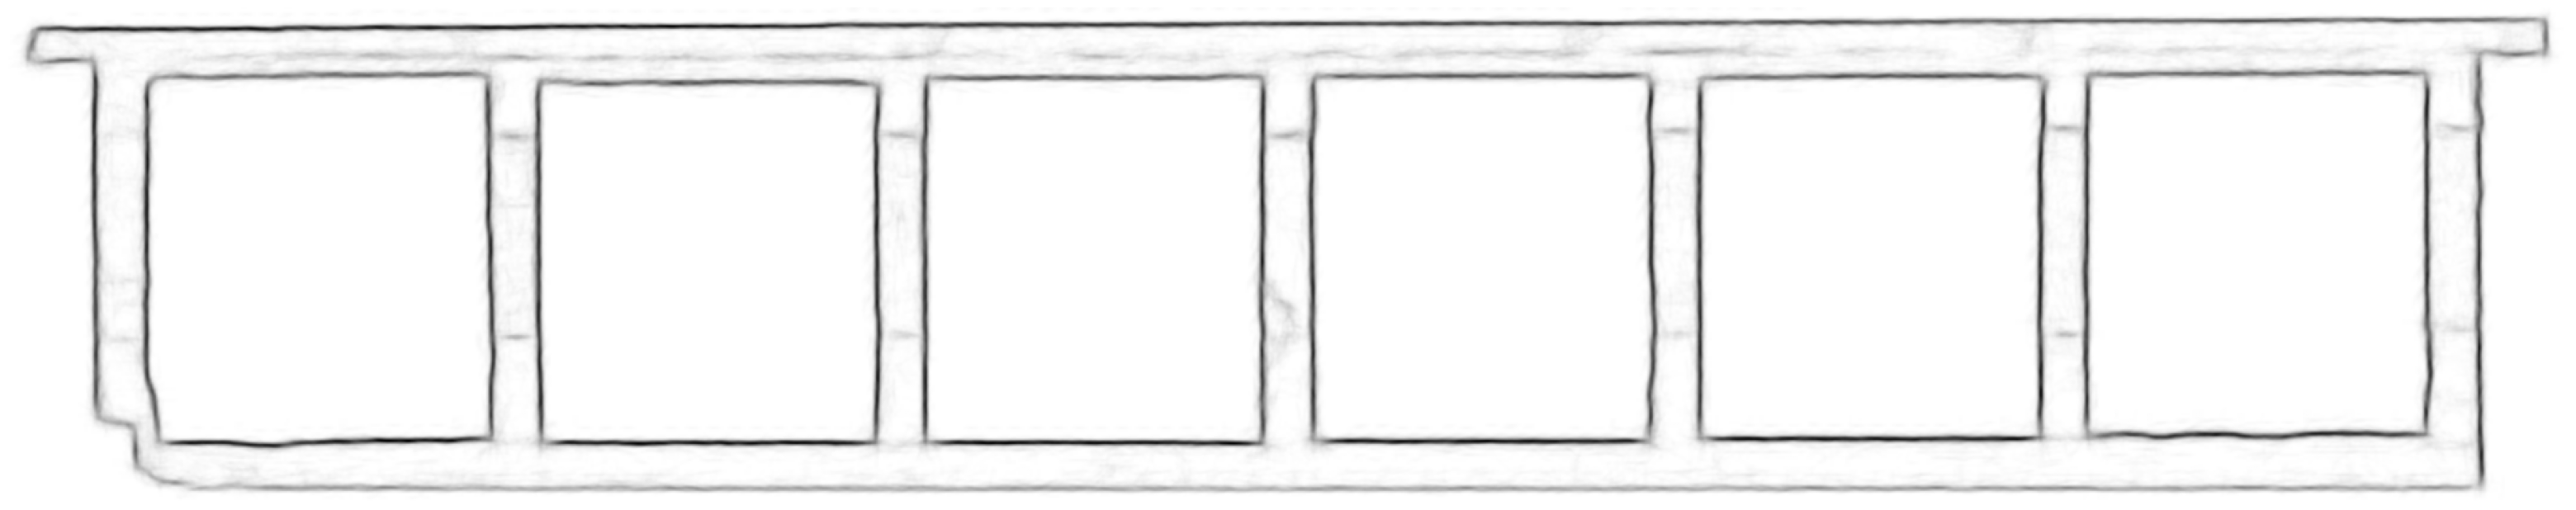

In [62]:
print("HED RESULT")
disp(255-(hede(img)))


BINARY


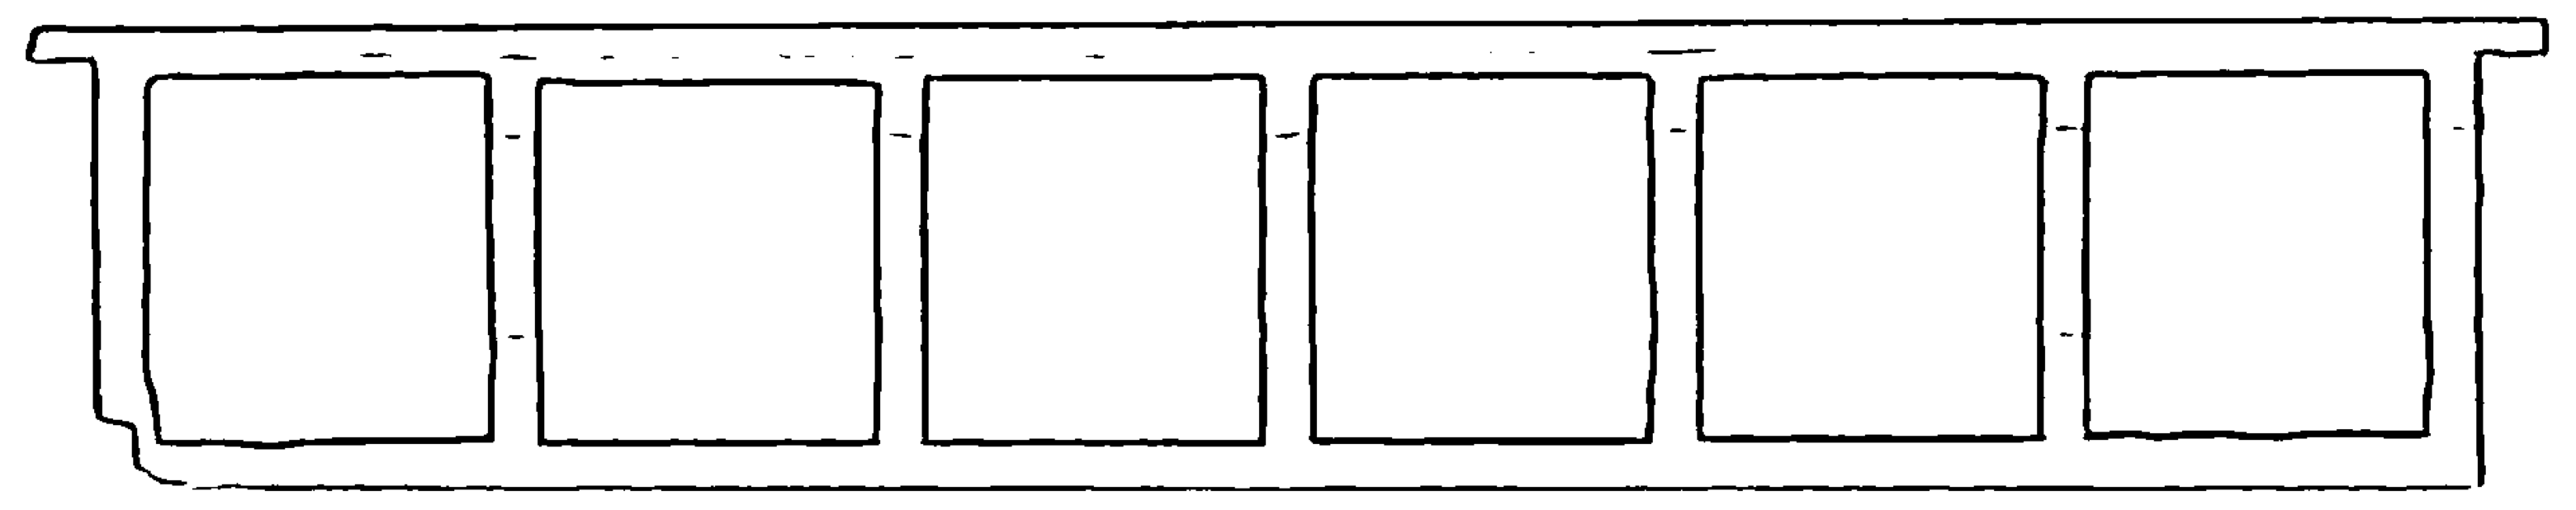

In [73]:
print("BINARY")
th=200
im1=255-hede(img)
im2=binc(im1,th)
disp(im2)

DILATED


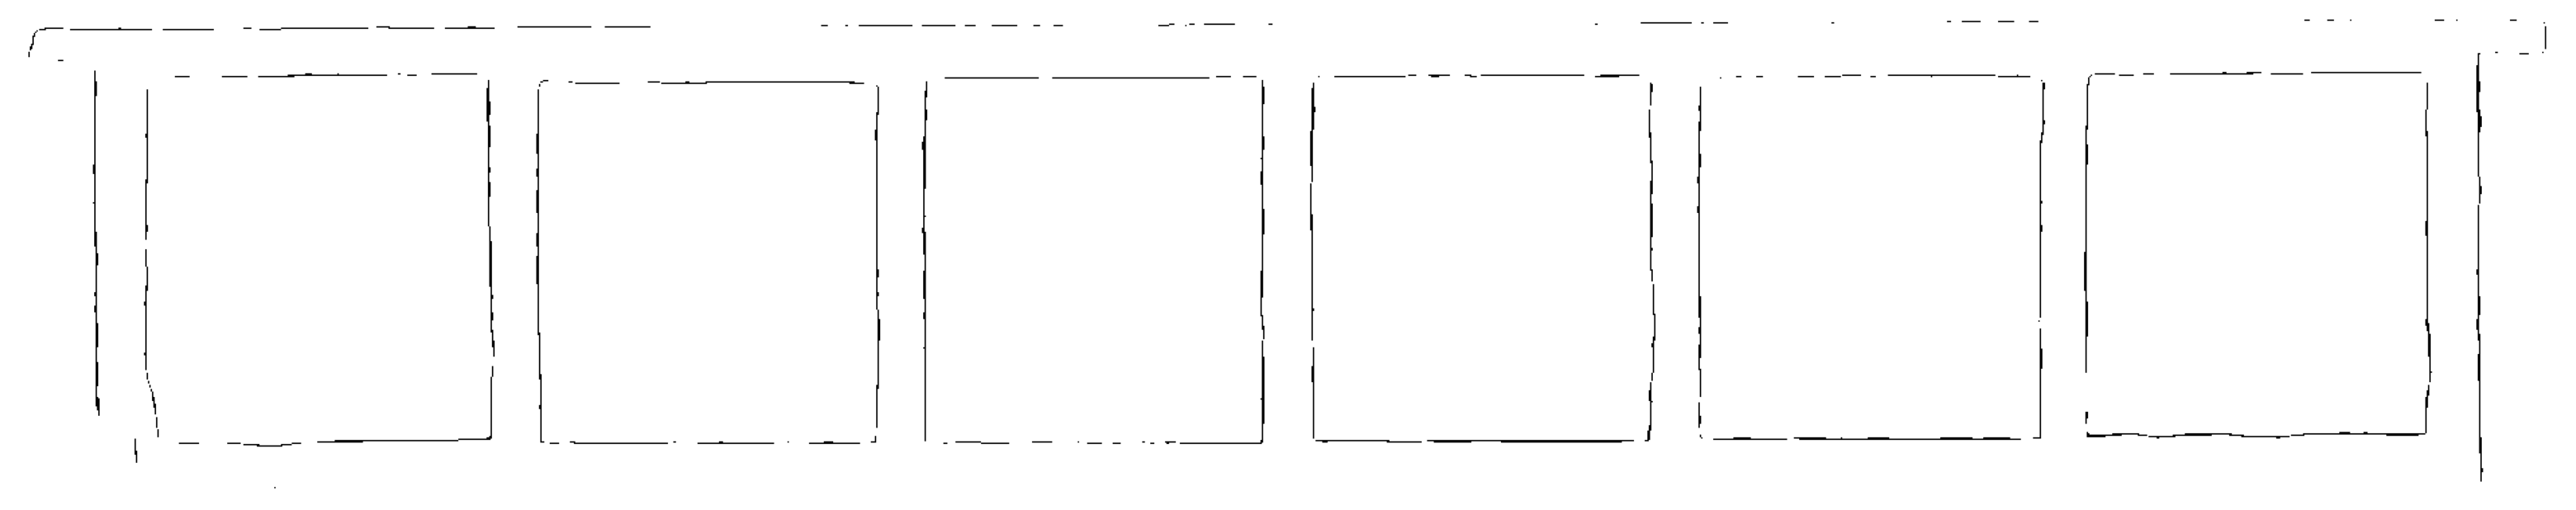

In [79]:
print("DILATED")
im3=erd(im2,3)
disp(dil(im3,7))

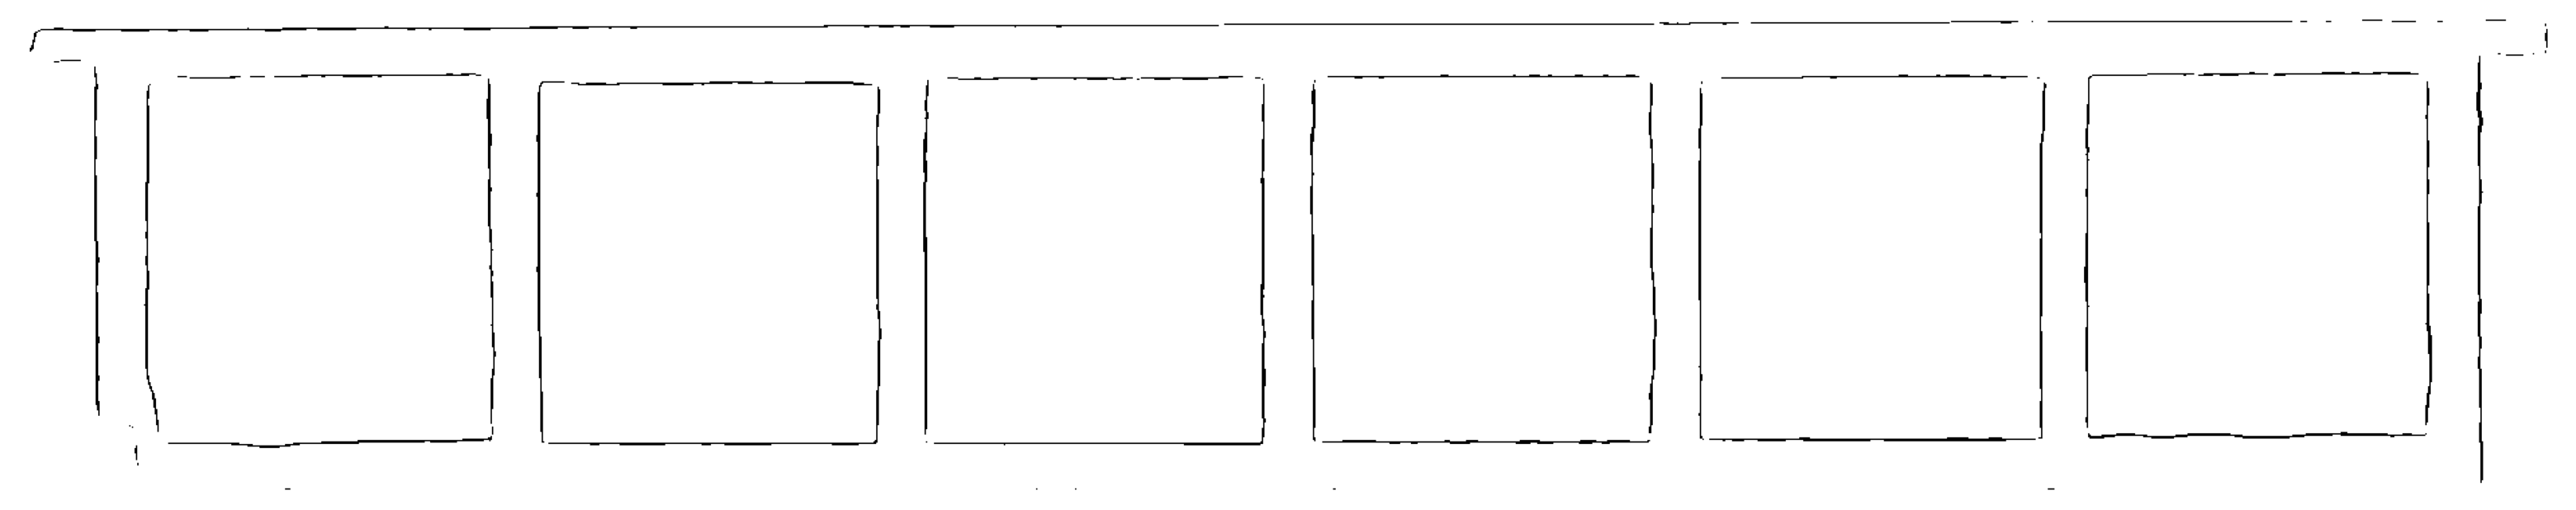

In [59]:

im1=255-hede(img)
im2=bin(im1)
disp(dil(im2,4))
# disp(im2)

##LOADING IMAGE

In [37]:
img=cv2.imread('/content/gsck3.png',cv2.IMREAD_GRAYSCALE)


##EDGE DETECTING FUNCTION

In [41]:
def hede(img):

  hed = cv2.ximgproc.createStructuredEdgeDetection('model.yml.gz')
  edges = hed.detectEdges(cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)
  edges_uint8 = (edges * 255).astype(np.uint8)  # Convert float32 [0,1] → uint8 [0,255]

  return edges_uint8

##DISPLAY FUNCTION

In [4]:
def disp(img):
  # Display results
  plt.figure(figsize=(40, 40))
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

##OPENCV LSD

In [5]:
def dlsd(img):
  # Load image (upload your own or use a sample)
  # image_path = "/content/drive/MyDrive/DATASETS/gsck1.png"  # Change this to your image path
  # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  #img = dilated.copy()
  # Create LSD detector

  img1=img.copy()
  lsd = cv2.createLineSegmentDetector(0)


  # Detect lines
  lines = lsd.detect(img)[0]

  # Create a black image of the same size
  lines_img = np.zeros_like(img1)

  # Draw detected lines in white
  for line in lines:
      x1, y1, x2, y2 = map(int, line[0])
      cv2.line(lines_img, (x1, y1), (x2, y2), 255, 2)  # White lines on black background

  return (255-lines_img)

##DILATION

In [45]:
def dil(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(img, kernel, iterations=1)
    return dilated


##EROSION

In [46]:

def erd(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded = cv2.erode(img, kernel, iterations=1)
    return eroded

#BINARY

In [63]:
def bin(img):
  _, binary_image = cv2.threshold(img,250, 255, cv2.THRESH_BINARY)
  return binary_image

In [66]:
def binc(img,th):
  _, binary_image = cv2.threshold(img,th, 255, cv2.THRESH_BINARY)
  return binary_image

##ROUGH CODE

In [ ]:
# Upload your image
uploaded = files.upload()
image_path = next(iter(uploaded))

IMG1=detect_edges(image_path)
IMG2=dlsd(IMG1[1])
disp(IMG2)


# disp(detect_edges(image_path)[1])

In [ ]:
# Install required packages

def detect_edges(image_path):
    # Read image
    image = cv2.imread(image_path)

    # Initialize HED
    hed = cv2.ximgproc.createStructuredEdgeDetection('model.yml.gz')

    # Process image
    edges = hed.detectEdges(cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB), edges
    # return edges
